In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

импорт библиотек и загрузка датасета

In [2]:
df = pd.read_csv("vgsales_2.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12200,59.0,6.0,2004.0,Sports,6.0,5.0,0.01,0.00,0.00,0.07
1,10814,261.0,21.0,2002.0,Action,6.0,7.0,0.02,0.00,0.00,0.10
2,894,242.0,18.0,2008.0,Sports,89.0,91.0,0.00,0.29,0.12,1.93
3,4808,510.0,11.0,2008.0,Action,117.0,0.0,0.00,0.40,0.00,0.40
4,13925,104.0,22.0,2015.0,Sports,120.0,0.0,0.04,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
548,4143,396.0,18.0,2008.0,Simulation,37.0,37.0,0.03,0.04,0.04,0.48
549,14462,146.0,21.0,2003.0,Racing,85.0,2.0,0.01,0.00,0.00,0.03
550,7513,147.0,1.0,2011.0,Action,68.0,16.0,0.03,0.00,0.01,0.20
551,872,474.0,20.0,2006.0,Shooter,122.0,82.0,0.65,0.02,0.20,1.96


после трансформируем все строковые значения в наборе данных в бинарные формы. используем - "OrdinalEncoder" и "OneHotEncoder", а также функцию "fit_transform".

In [3]:
from sklearn.preprocessing import OrdinalEncoder

Oenc = OrdinalEncoder()
df [['Name', 'Platform', 'Year', 'Publisher']] = Oenc.fit_transform(df[['Name', 'Platform', 'Year', 'Publisher']])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12200,59.0,6.0,18.0,Sports,6.0,5.0,0.01,0.00,0.00,0.07
1,10814,261.0,21.0,16.0,Action,6.0,7.0,0.02,0.00,0.00,0.10
2,894,242.0,18.0,22.0,Sports,89.0,91.0,0.00,0.29,0.12,1.93
3,4808,510.0,11.0,22.0,Action,117.0,0.0,0.00,0.40,0.00,0.40
4,13925,104.0,22.0,29.0,Sports,120.0,0.0,0.04,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
548,4143,396.0,18.0,22.0,Simulation,37.0,37.0,0.03,0.04,0.04,0.48
549,14462,146.0,21.0,17.0,Racing,85.0,2.0,0.01,0.00,0.00,0.03
550,7513,147.0,1.0,25.0,Action,68.0,16.0,0.03,0.00,0.01,0.20
551,872,474.0,20.0,20.0,Shooter,122.0,82.0,0.65,0.02,0.20,1.96


для "Genre" используем "OneHotEncoder" из-за +- одинакового количества 0 и 1.  "Action" будет 1, а остальное 0.

In [4]:
from sklearn.preprocessing import OneHotEncoder

OHenc = OneHotEncoder()
df['Genre'] = OHenc.fit_transform(df[['Genre']]).toarray()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12200,59.0,6.0,18.0,0.0,6.0,5.0,0.01,0.00,0.00,0.07
1,10814,261.0,21.0,16.0,1.0,6.0,7.0,0.02,0.00,0.00,0.10
2,894,242.0,18.0,22.0,0.0,89.0,91.0,0.00,0.29,0.12,1.93
3,4808,510.0,11.0,22.0,1.0,117.0,0.0,0.00,0.40,0.00,0.40
4,13925,104.0,22.0,29.0,0.0,120.0,0.0,0.04,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
548,4143,396.0,18.0,22.0,0.0,37.0,37.0,0.03,0.04,0.04,0.48
549,14462,146.0,21.0,17.0,0.0,85.0,2.0,0.01,0.00,0.00,0.03
550,7513,147.0,1.0,25.0,1.0,68.0,16.0,0.03,0.00,0.01,0.20
551,872,474.0,20.0,20.0,0.0,122.0,82.0,0.65,0.02,0.20,1.96


подключаем библиотеку "train_test_split". "Y" - обучающие данные, "Х" - тестовые данные. и далее создаем выборки через функцию "train_test_split"

In [5]:
from sklearn.model_selection import train_test_split

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y)

удаление пустых полей

In [7]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]

In [8]:
x_test = x_test.dropna()
y_test = y_test[x_test.index]

подключаем библиотеку "DecisionTreeClassifier" и используем функцию "fit"

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier()
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])

создаём график, отображающий дерево решений "dtc_plot"

[Text(0.7241379310344828, 0.9285714285714286, 'x[3] <= 24.5\ngini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(0.5862068965517241, 0.7857142857142857, 'x[4] <= 124.0\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(0.5172413793103449, 0.6428571428571429, 'x[8] <= 0.1\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(0.27586206896551724, 0.5, 'x[1] <= 76.5\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.13793103448275862, 0.35714285714285715, 'x[1] <= 63.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06896551724137931, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20689655172413793, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.41379310344827586, 0.35714285714285715, 'x[6] <= 0.07\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.3448275862068966, 0.21428571428571427, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.4827586206896552, 0.21428571428571427, 'x[6] <= 0.1\ngini = 0.219\nsamples = 8\nv

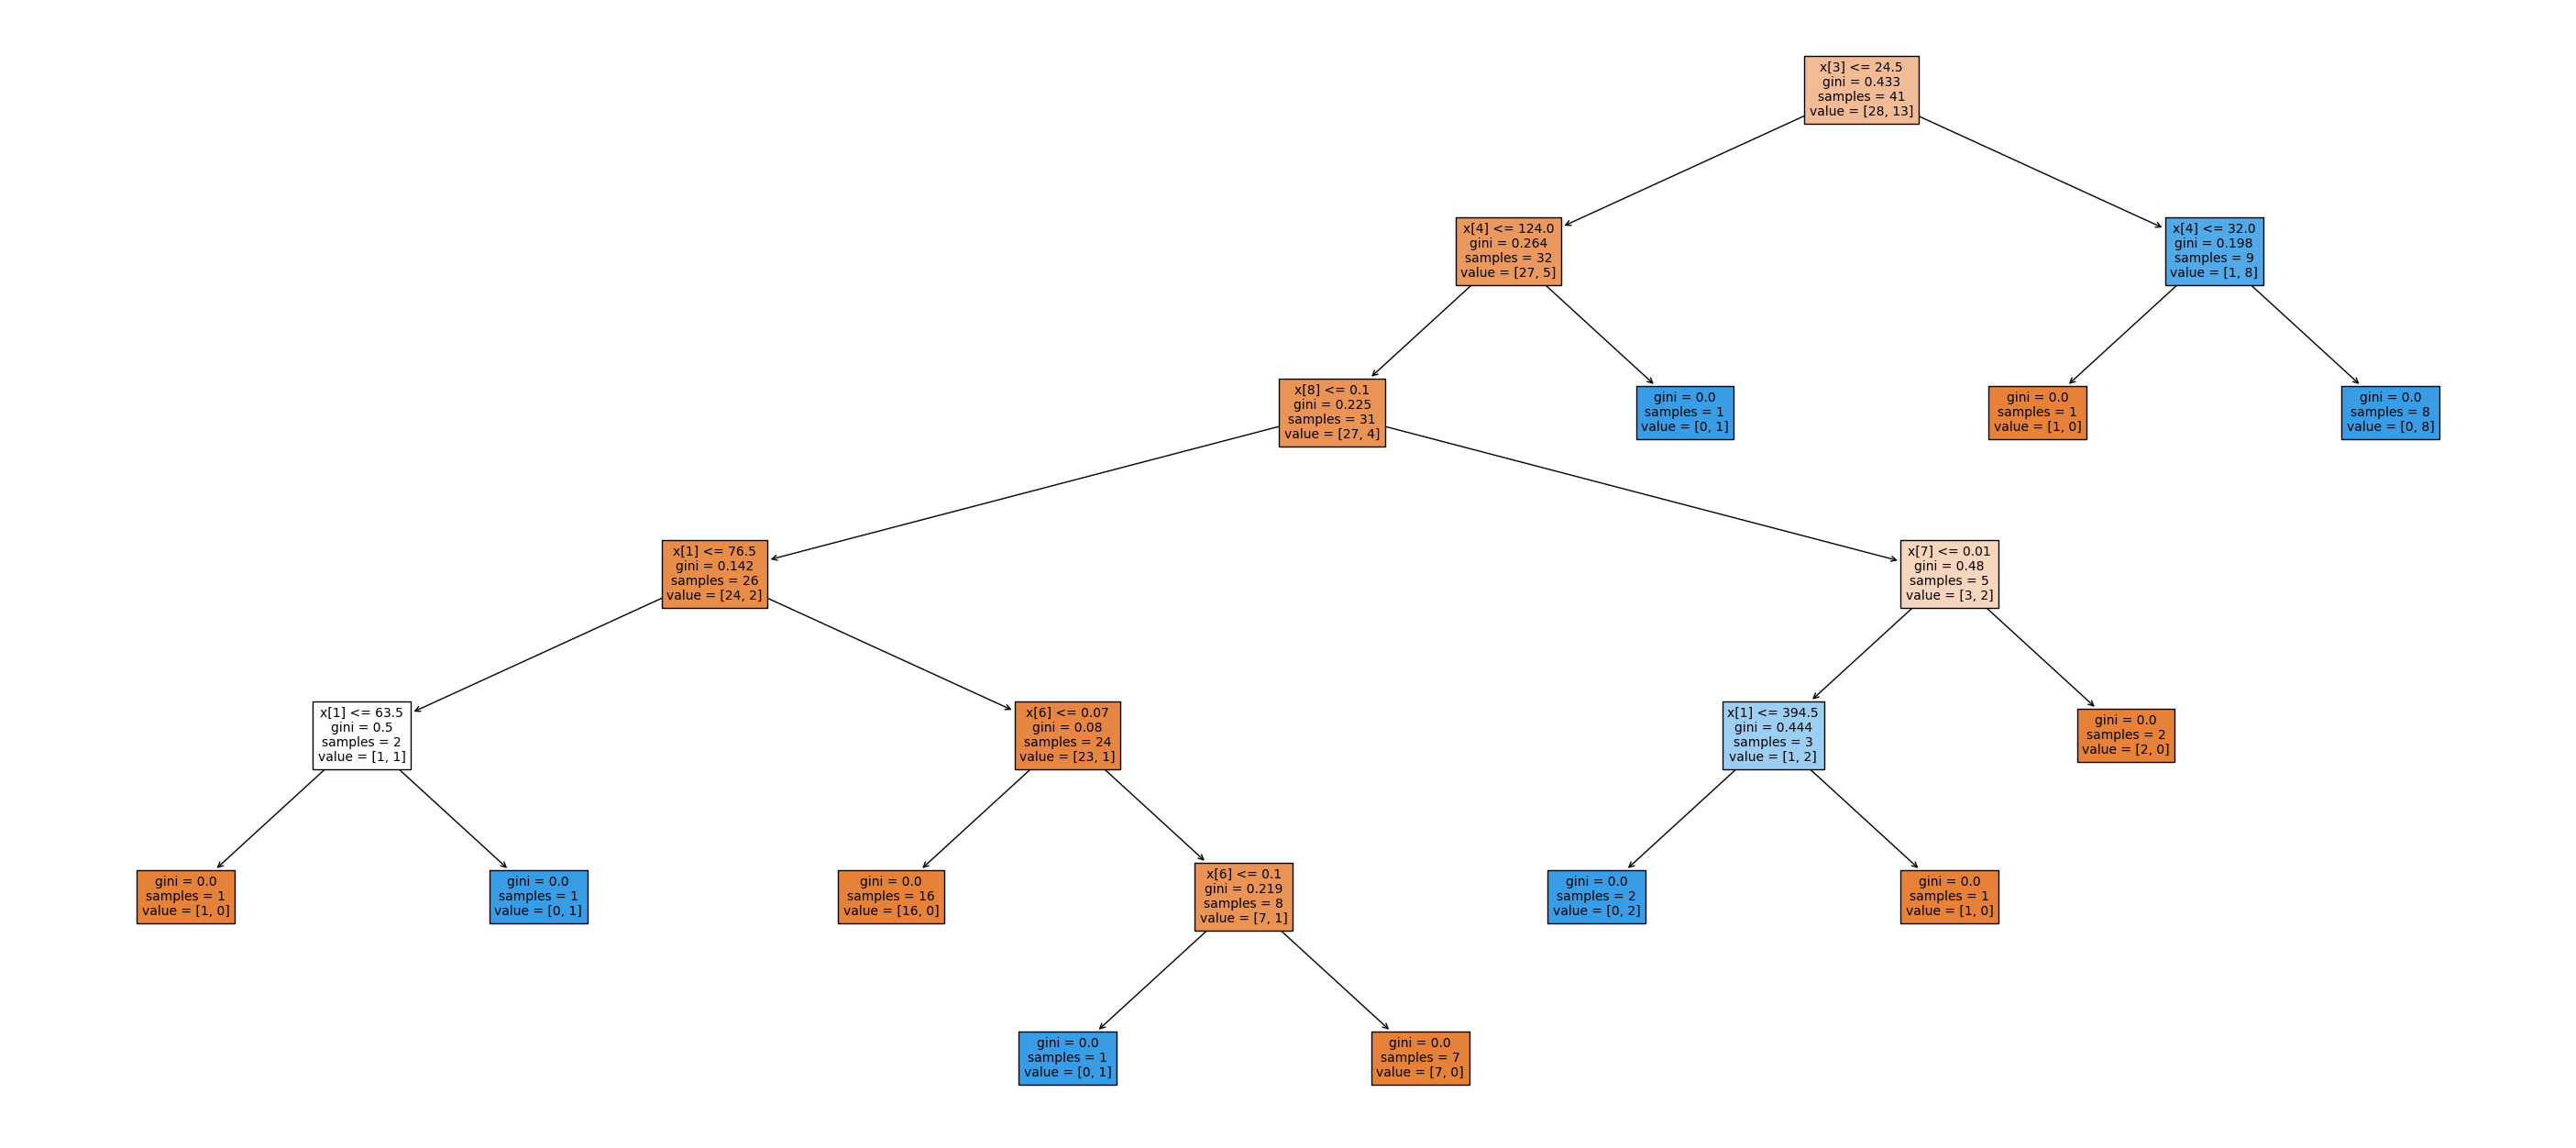

In [10]:
from sklearn import tree
plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

используем метрики (confusion matrix, accuracy score, recall score, precision score, f1 score) и проводим анализ точности модели.

Text(50.722222222222214, 0.5, 'Реально')

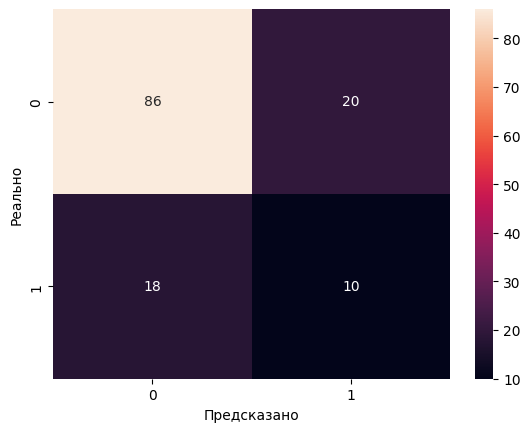

In [11]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

In [12]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.7164179104477612
Чувствительность 0.35714285714285715
Аккуратность 0.3333333333333333
Финальная 0.3448275862068965


1- Примерно 71% всех предсказаний модели были правильными, что отражает ее точность, определяемую как доля правильных предсказаний от общего числа предсказаний.
2- Приблизительно 35% фактически положительных случаев были корректно определены моделью, что означает, что ее чувствительность составляет примерно 35%.
3-Около 33% из всех предсказанных положительных случаев были правильно определены моделью, что соответствует ее аккуратности около 42%.
4- Значение финальной метрики составляет около 34% и отражает баланс между точностью и чувствительностью модели. Она является полезной оценкой, особенно при дисбалансе классов или равной    важности обеих метрик.

воспроизводим ранее сделанные функции на модель "Дерево решений" с гиперпараметрами.

[Text(0.5555555555555556, 0.875, 'x[4] <= 102.5\ngini = 0.375\nsamples = 44\nvalue = [33, 11]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 431.0\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= 13633.5\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 394.5\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 16.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]')]

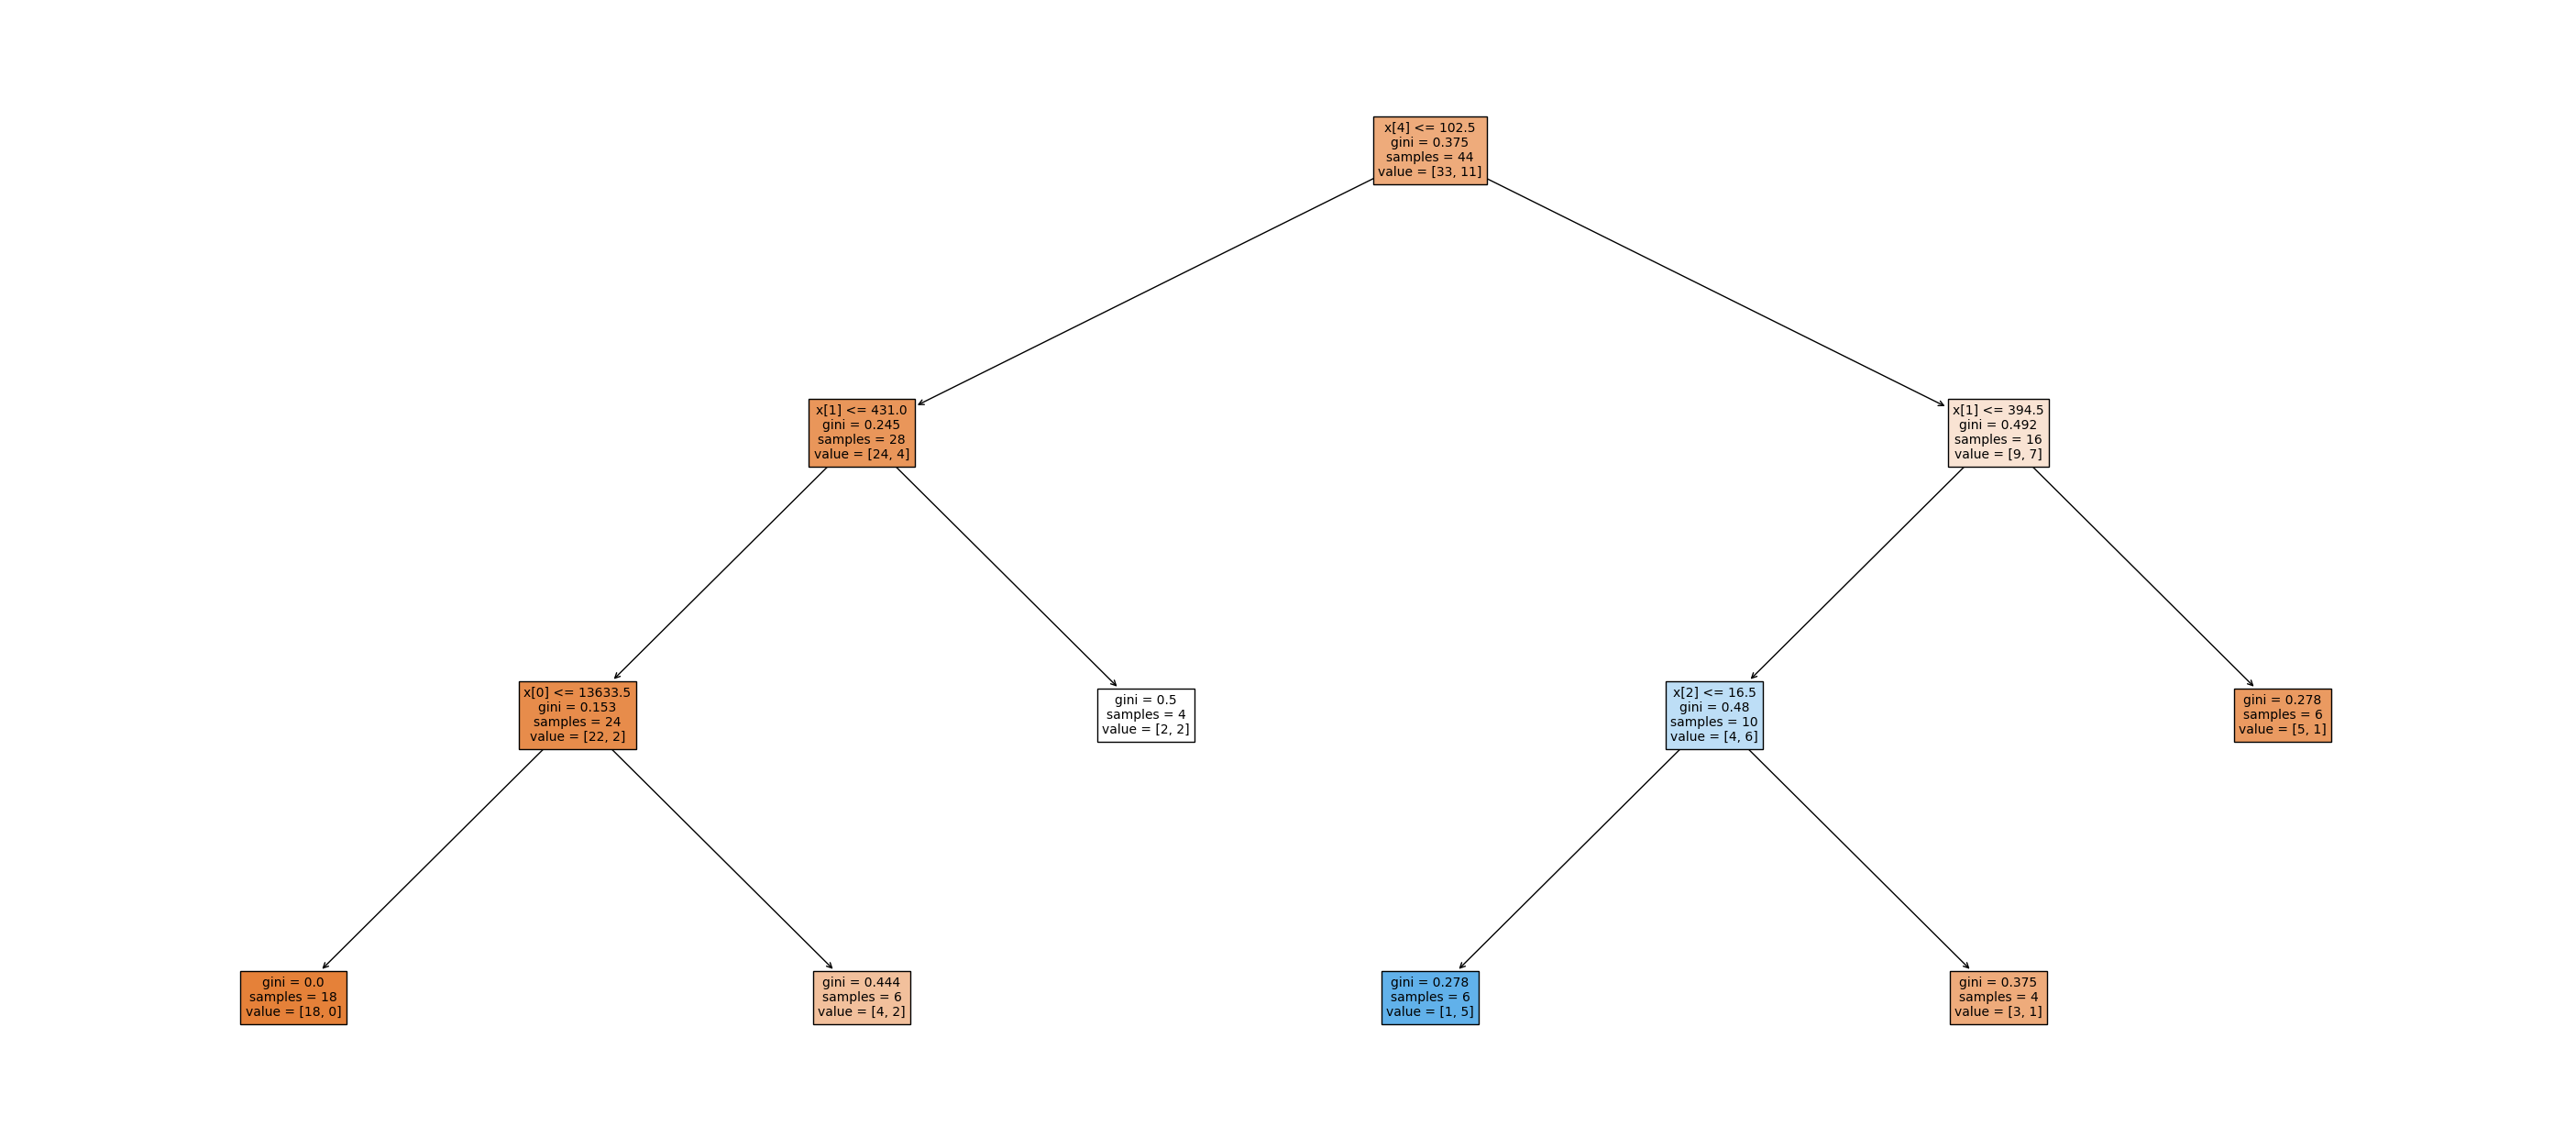

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

x_train = x_train.dropna()
y_train = y_train[x_train.index]
x_test = x_test.dropna()
y_test = y_test[x_test.index]

dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=200)
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])

plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

Text(50.722222222222214, 0.5, 'Реально')

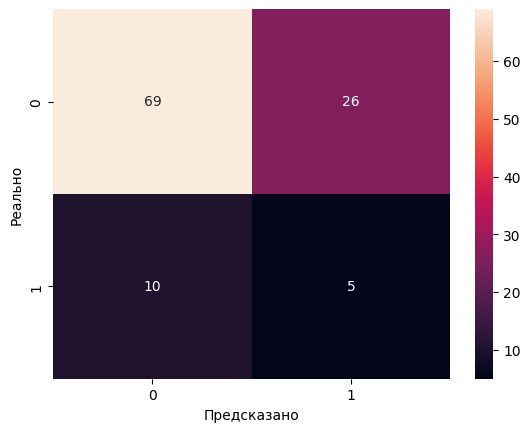

In [17]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

In [18]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.6727272727272727
Чувствительность 0.3333333333333333
Аккуратность 0.16129032258064516
Финальная 0.21739130434782605



1- Приблизительно 67% всех предсказаний модели были верными, что отражает ее точность, определяемую как доля правильных предсказаний от общего числа предсказаний.
2- Модель достигает чувствительности около 33%, что означает, что она правильно определяет около 33% фактически положительных случаев, из общего количества таких случаев.
3- Около 16% предсказанных положительных случаев были правильно определены моделью, что соответствует ее аккуратности около 16%. Аккуратность измеряет долю правильно определенных положительных случаев от общего количества предсказанных положительных случаев.
4- Значение финальной метрики составляет около 21% и отражает баланс между точностью и чувствительностью модели. Она является полезной оценкой, особенно при дисбалансе классов или равной важности обеих метрик.